
# Project: Movie Database (TMdb) data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

The questions we will be addressing in this report are as follows:
1. Which was the most popular movie every year from 2010 to 2015?
2. What factors are associated with movies that have high revenues?
3. Which are the top 10 movies with highest revenue?
4. Which are the top 10 most profitable genres?
5. Which actor movies were released the most in 2015?


In [27]:
# Packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (Replace this with more specific notes!)

In [3]:
#find number of rows and columns
df.shape


(10866, 21)

There are 10866 rows of data and 21 columns. 

In [4]:
#identify missing or null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Here we can observe thare are null values for imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production companie. These are all String fields and cannot be filled up using our wrangling procedures. 

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#remove duplicates
sum(df.duplicated())
df.drop_duplicates(inplace=True)

We have dropped the duplicate rows. 

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here we can observe, the runtime of movies is mostly between 90 min to 111 minutes. Usually the voting average falls between 5.4 and 6.6, very exceptionally it went to maximum 9.2. 

In [7]:
# Drop columns not needed:
dropList = ['id', 'imdb_id','overview','keywords','homepage','tagline','release_date','budget_adj','revenue_adj','production_companies']
df.drop(dropList, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


We have dropped columns that are not needed for our research questions. 

In [8]:
# fill null values with mean
#df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


> There is no non-numerical(cast, director,genres) missing data. These data cannot be filled . There are 10865 movie ratings information(rows) and 11 columns. 

We will drop the missing information for these non-numerical fields. 

In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.0+ KB


Now we have got rid of all the missing data and total rows have now reduced to 10732.

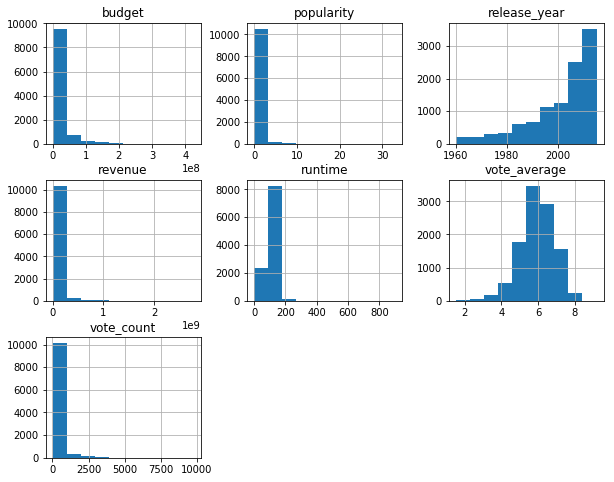

In [10]:
#Data histogram for the entire numerical data to understand the data distribution
df.hist(figsize=(10,8));

In the above distributions some of the major observations are:
    1. The rate at which movies were released per year increased exponentially. 
    2. Most of the average vote received was between 5 and 7 
    3. We can observe budget, revenue, vote_count, runtime, popularity skewed to the left and we can observe clear outliers in these categories. 

In [11]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

###  Research Question 1:  Which movies was the most popular movie every year (2010 - 2015)?


Popularity, revenue, vote_average are the dependent variables and rest of the variables are independent variables. But we still have to see which independent variables affect these dependent variables.  

In [12]:
# Select relevant columns, sort by popularity ascending, remove all but movie with maximum popularity and display the result
df[['popularity','original_title','release_year']].sort_values('popularity').drop_duplicates('release_year',keep='last').sort_values('release_year',ascending=False).drop(columns=['popularity']).reset_index().head(6)


,index,original_title,release_year
0,0,Jurassic World,2015
1,629,Interstellar,2014
2,5422,Frozen,2013
3,4361,The Avengers,2012
4,3371,Underworld: Endless War,2011
5,1919,Inception,2010


### Research Question 2  : What factors are associated with movies that have high revenues?

In [13]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


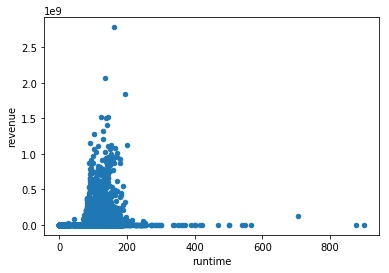

In [14]:
# Check relationship between revenue and movie runtime
df.plot(x='runtime',y='revenue',kind='scatter')

The revenue generated is highest if the run time is around 110 minutes. Movies with higher runtime than 200min or lower than 50 minutes generate very low revenue. But this also co-incides with the revenue distribution that we saw when we described our revenue data. There is a curvilinear relationship between revenue and runtime. 

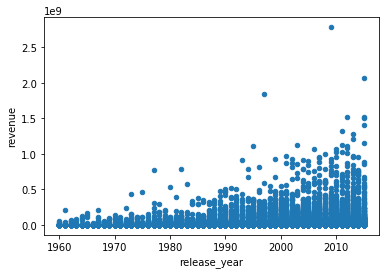

In [10]:
# Check relationship between revenue and release year
df.plot(x='release_year',y='revenue',kind='scatter')

Revenue of movies has been an increasing with time. Old movies generated less revenue than latest movies. There is a perfect positive corelation between release_year and revenue.

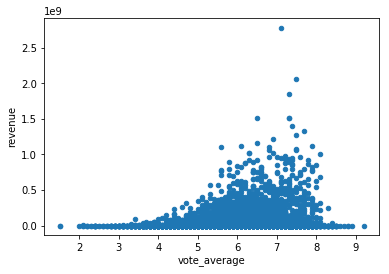

In [11]:
# Check relationship between revenue and voting average
df.plot(x='vote_average',y='revenue',kind='scatter')

Movies with voting average between 6.5 and 7.5 seem to generate a higher revenue than other movies.There is a curvilinear relationship between the voting_average and revenue.

Pearsons correlation: 0.734


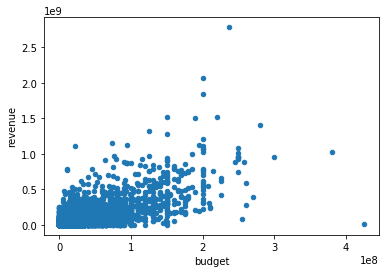

In [24]:
# Check relationship between revenue and budget
df.plot(x='budget',y='revenue',kind='scatter')
corr, _ = pearsonr(df.budget, df.revenue)
print('Pearsons correlation: %.3f' % corr)

Most of the data seems to be clustered in th lower quarter of the chart. Budget highter than 200 trillion dollars or revenue higher than 1 trillion dollars are outliers. There is a moderately strong positive co-relation relationship between movie budget and revenue. 

Pearsons correlation: 0.663


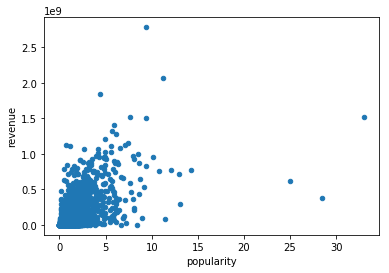

In [26]:
# Check relationship between popularity and revenue
df.plot(x='popularity',y='revenue',kind='scatter')
corr, _ = pearsonr(df.popularity, df.revenue)
print('Pearsons correlation: %.3f' % corr)

There is a moderately strong positive co-relation between a movie popularity and revenue it generates. 

### Research Question 3: Which are the top 10 movies with highest revenue?

In [181]:
df[['original_title','revenue']].sort_values('revenue',ascending=False).head(10).drop(columns=['revenue']).reset_index().rename(columns={'original_title':'Top 10 movies with highest revenue'})

,index,Top 10 movies with highest revenue
0,1386,Avatar
1,3,Star Wars: The Force Awakens
2,5231,Titanic
3,4361,The Avengers
4,0,Jurassic World
5,4,Furious 7
6,14,Avengers: Age of Ultron
7,3374,Harry Potter and the Deathly Hallows: Part 2
8,5422,Frozen
9,5425,Iron Man 3


### Research Question 4: Which are the top 10 most profitable genres?

In [172]:
df['profit']=df['revenue'] - df['budget']
df_temp=df[['profit','genres']].groupby('genres').agg('mean')
df_temp.sort_values('profit',ascending=False).head(10).reset_index().drop(columns=['profit']).rename(columns={'genres':'Most profitable genres'})

,Most profitable genres
0,Crime|Drama|Mystery|Thriller|Action
1,Action|Adventure|Science Fiction|Fantasy
2,Family|Fantasy|Adventure
3,Adventure|Fantasy|Family|Mystery
4,Science Fiction|Adventure|Family|Fantasy
5,Family|Animation|Drama
6,Science Fiction|Thriller|Action|Adventure
7,Action|Thriller|Science Fiction|Mystery|Adventure
8,Science Fiction|Adventure|Thriller
9,Science Fiction|Adventure|Fantasy


We can see above which combination of genres was most profitable over the years.

### Research Question 5: Top 5 actor movies which were released the most in 2015?

In [171]:
#select dataset where the year is 2015 and remove NA values
df_2015=df.loc[df['release_year'] == 2015, ['cast']].dropna().reindex()

#Split the cast column and stack it in rows using stack function. Drop rows with multiple values and remove the index column
df_cast=df_2015.drop('cast', axis=1).join(df['cast'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('cast')).reset_index().drop(columns=['index'])

#Find count of per row and take the top 5 actors. 
df_cast['cast'].value_counts().head(5).reset_index().rename(columns={'index':'Actor','cast':'Total Movies in 2015'})




,Actor,Total Movies in 2015
0,Ben Kingsley,6
1,James Franco,6
2,Rachel McAdams,5
3,Sienna Miller,5
4,Robert De Niro,5


<a id='conclusions'></a>
## Conclusions

In conclusion,
1. Movies which were released recently have higher revenue advantages over older movies. 
2. Movies which are more popular generate higher revenue.  
3. There is a stronger positve (against popularity) co-relation between a budget of a movie and the revenue it generates.
4. A movie with an average voting between 6.5 and 7.5 has a potential to generate more revenue. As voting average increases revenue peaks and then falls.
5. Movies with longer runtimes than 110 minutes, generates less revenue.As movie runtime increases revenue peaks around 110 minutes and then falls as runtime increases. 